# Import the necessary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
sns.set_color_codes()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Read the data as a data frame

In [77]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Perform basic EDA

## Shape of the data

In [78]:
print('The total number of rows :', data.shape[0])
print('The total number of columns :', data.shape[1])

The total number of rows : 1338
The total number of columns : 7


## Data type of each attribute

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking the presence of missing values

In [80]:
print(data.isna().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 5 point summary of numerical attributes

In [81]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


__Obervations based on 5 Point Summary__

1. **Age**: 
    It looks evenly distributed as can be seen with values of min, Q1, Q2, Q3, max, and also since mean and median are almost same.
2. **BMI**:
    It looks evenly distributed when you take into account Q1,Q2,Q3. There are few outliers at the top end of values,
    
    For eg.,
    IQR = 34.694 - 26.296 = 8.398. Max = 1.5 * IQR = 1.5 * 8.398 = 12.597. 
    top whisker = 34.693 + 12.597 = 47.289        
    Since max values (53.13) is greater than top whisker, it is an outlier. And there may be more outliers. 
    
    This will be more clear with a boxplot, which will be shown later in this document.
    
3. **Children**:
    Since the min =0 and max value = 5 i.e. with the values of 0,1,2,3,4,5, it looks more like a Categorical attribute than continuous.
    
4. **Charges**:
    It looks a bit skewed towards the right side as mean (13270) is greater than median 50% (9382) and there may be many outliers at the top end of values.
    

## Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Text(0.5, 0, 'Charges')

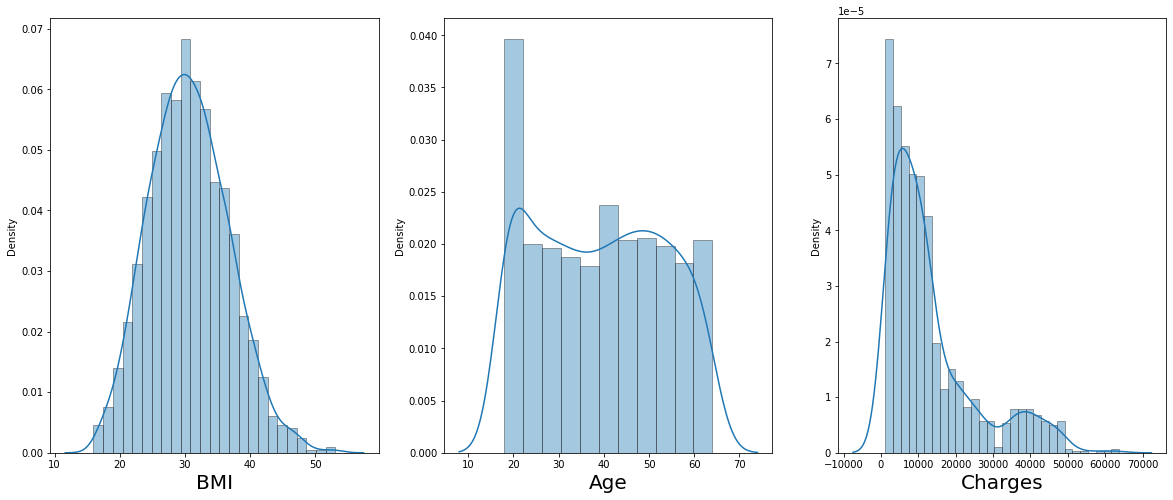

In [82]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))
bmi = sns.distplot(data['bmi'], ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
bmi.set_xlabel("BMI",fontsize=20)

age = sns.distplot(data['age'], ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
age.set_xlabel("Age",fontsize=20)

charges = sns.distplot(data['charges'], ax = axes[2], kde=True, hist_kws={"edgecolor":"k"})
charges.set_xlabel("Charges",fontsize=20)


1. **BMI** : Normally distributed
2. **Age** : Uniformly distributed throughout.
3. **Charges**: Right skewed.

## Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [83]:
pd.DataFrame.from_dict(dict(
    {
        'bmi':data.bmi.skew(), 
        'age': data.age.skew(), 
        'charges': data.charges.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
bmi,0.284047
age,0.055673
charges,1.515880


1. **BMI** : A low value indicates a uniform distribution of the data, corroborated by the plot above.
2. **Age** : The value is close to 0, i.e., indicates an almost ideal uniform distribution.
3. **Charges**: High positive skew indicates a positive skew, as observed in the above plot.

## Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Text(0.5, 0, 'Charges')

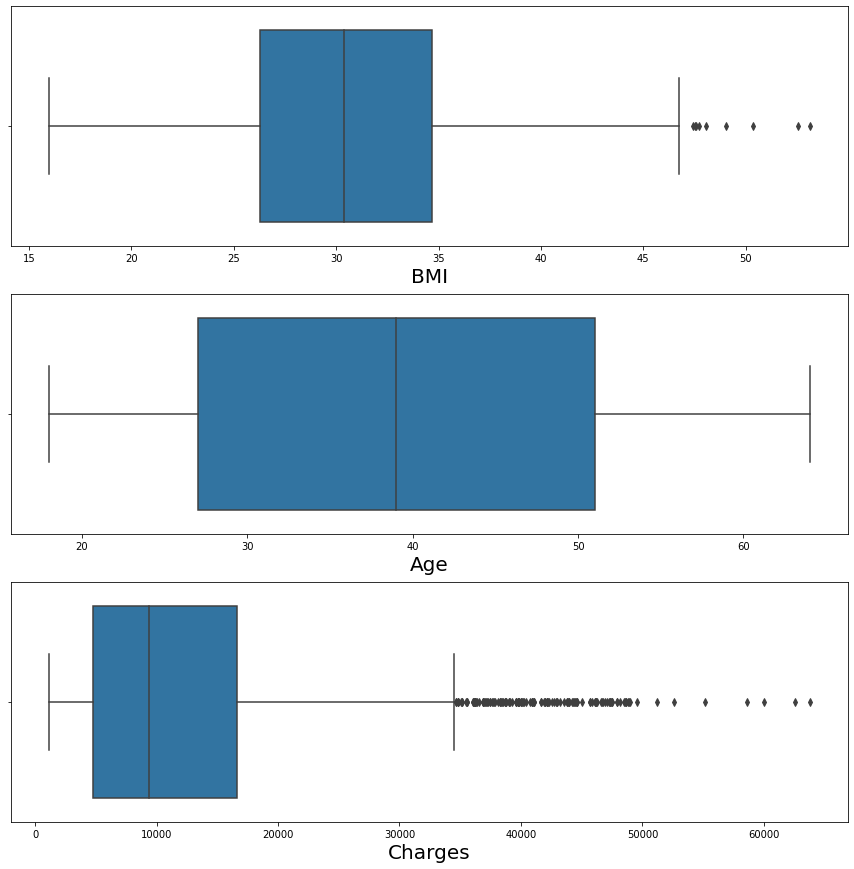

In [84]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
bmi = sns.boxplot(data['bmi'], ax=axes[0])
bmi.set_xlabel("BMI",fontsize=20)

age = sns.boxplot(data['age'], ax=axes[1])
age.set_xlabel("Age",fontsize=20)

charges = sns.boxplot(data['charges'], ax=axes[2])
charges.set_xlabel("Charges",fontsize=20)


1. **BMI** : Distributed with few outliers
2. **Age** : No outliers and uniformly distributed.
3. **Charges**: Right skewed with multiple outliers.

## Distribution of categorical columns (include children)

Listing Categorical Columns

1. Sex
2. Smoker
3. Region
4. Children


Text(0.5, 0, 'Children')

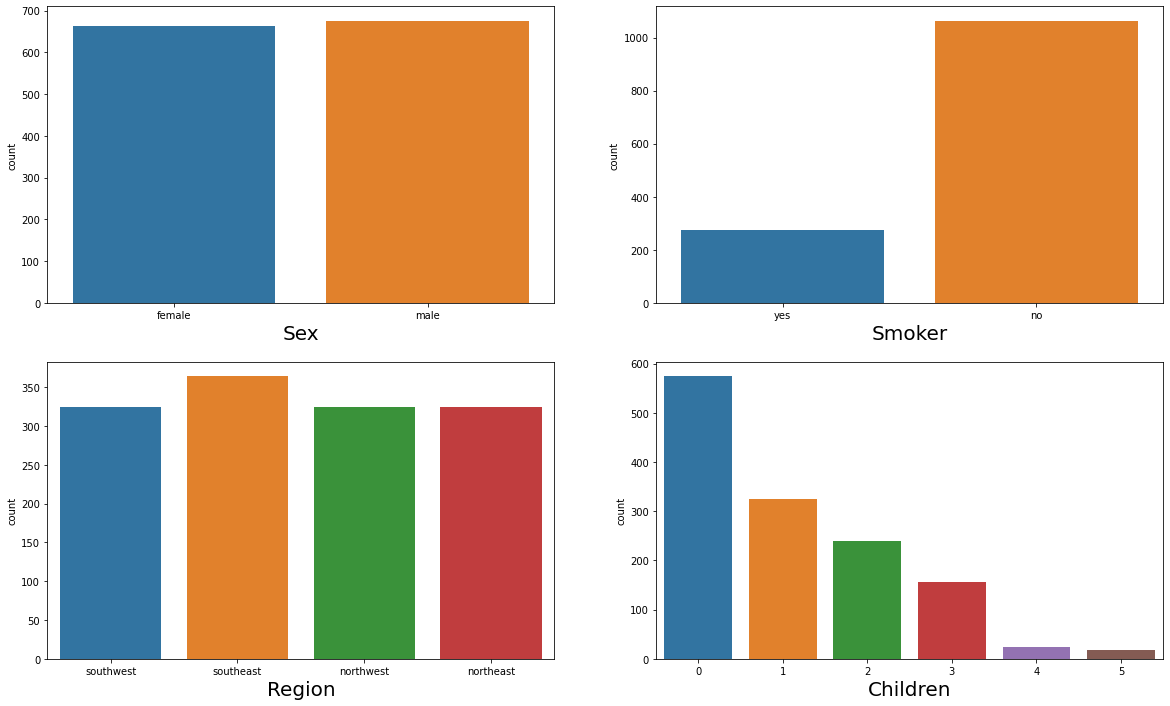

In [85]:
f, axes = plt.subplots(2, 2, figsize=(20, 12))
sex = sns.countplot(data['sex'], ax=axes[0,0])
sex.set_xlabel("Sex",fontsize=20)

smoker = sns.countplot(data['smoker'], ax = axes[0,1])
smoker.set_xlabel("Smoker",fontsize=20)

region = sns.countplot(data['region'], ax = axes[1,0])
region.set_xlabel("Region",fontsize=20)

children = sns.countplot(data['children'], ax = axes[1,1])
children.set_xlabel("Children",fontsize=20)

1. **Sex** : Insurances are evenly matched between Male and Female
2. **Smoker** : The number of Non-smokers far exceeds the number of smokers.
3. **Region** : Insurance is distributed almost evenly across all regions, with a small increase seen in the southeast region.
4. **Children** : Few insurance clients have 4 or more children, most have no child.

<AxesSubplot:xlabel='region', ylabel='charges'>

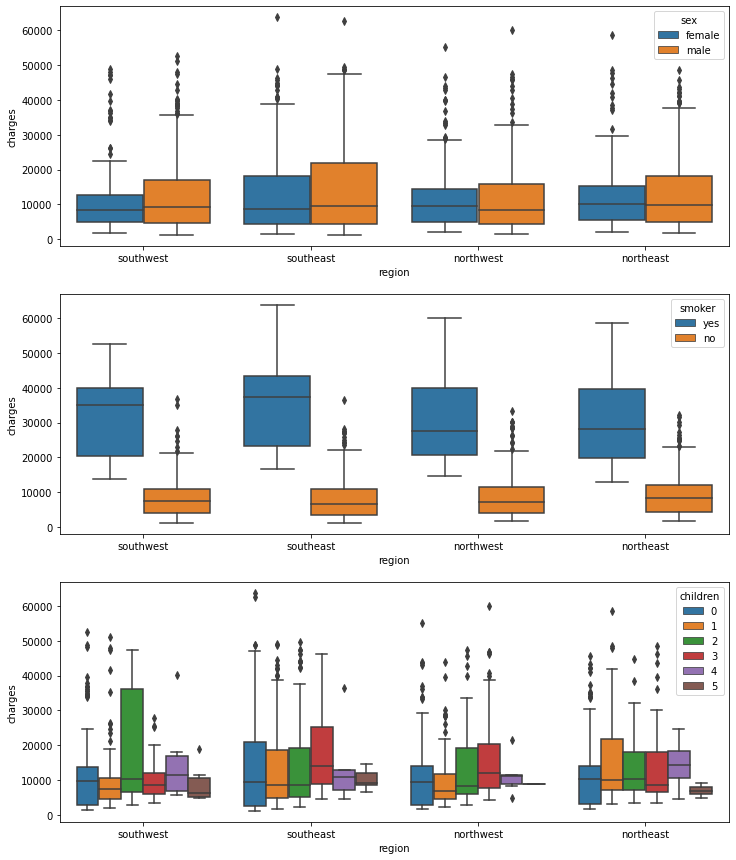

In [86]:
f, axes = plt.subplots(3, 1, figsize=(12, 15))
sns.boxplot('region', 'charges', 'sex', data, ax=axes[0])

sns.boxplot('region', 'charges', 'smoker', data, ax = axes[1])

sns.boxplot('region', 'charges', 'children', data, ax = axes[2])


## Pair plot that includes all the columns of the data frame

In [87]:
data_copy = data.copy()
data_copy.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [88]:
data_copy.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [89]:
data_copy.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

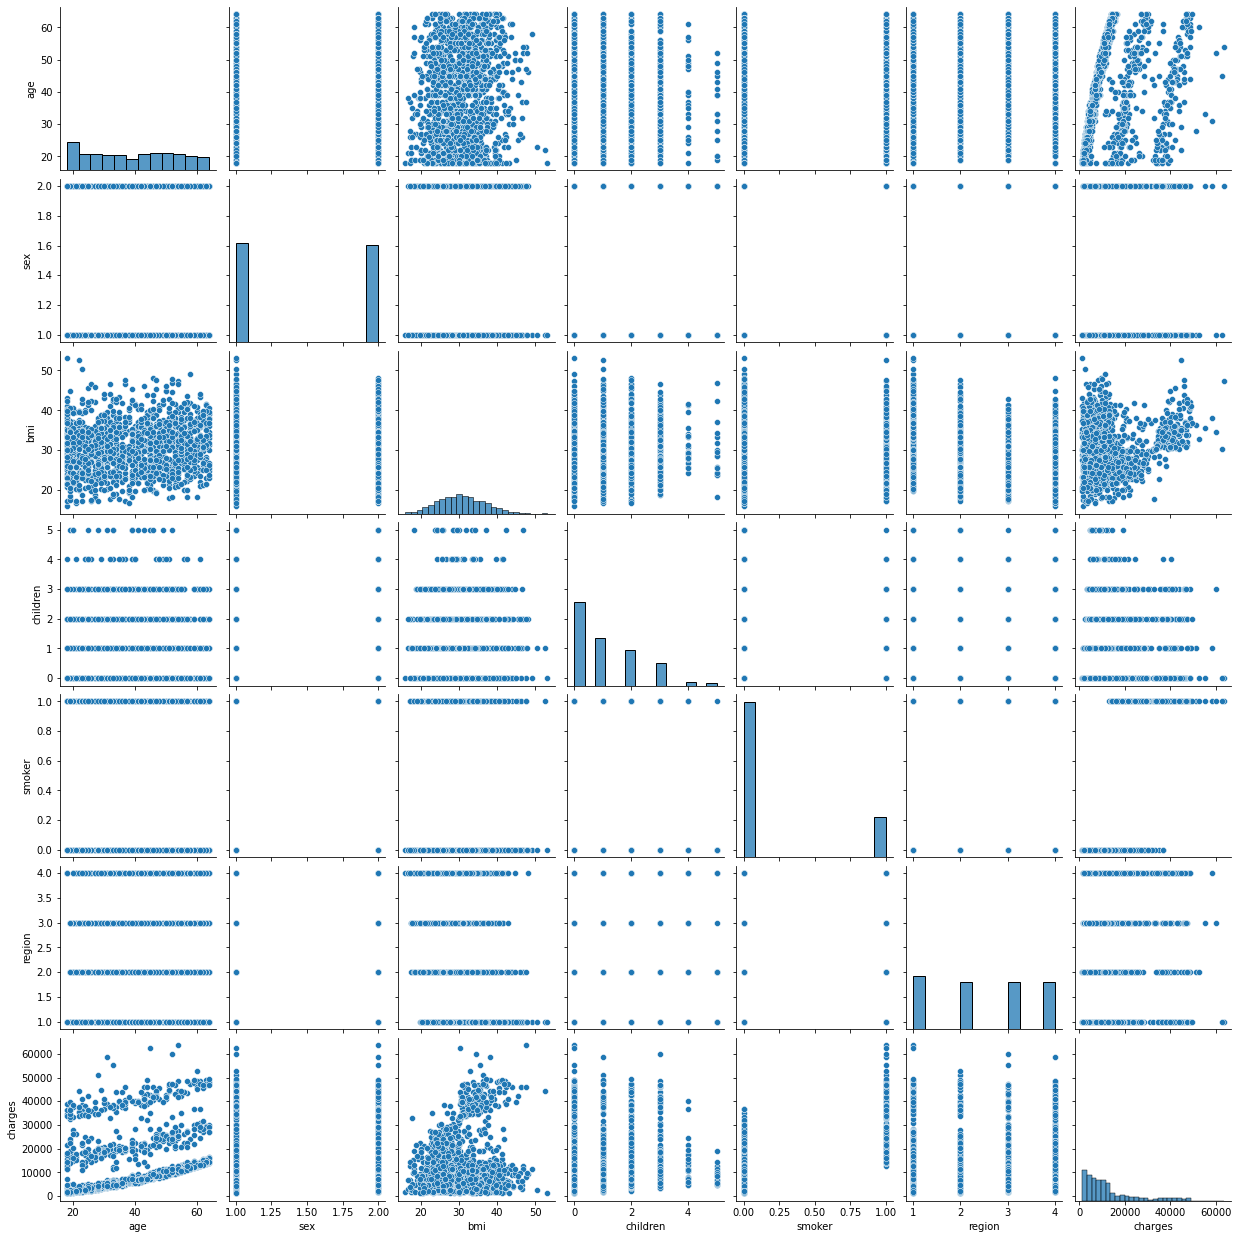

In [90]:
# Replace categorical columns with numerical equivalents

data_copy['sex'] = data_copy['sex'].replace({'male': 1, 'female': 2})
data_copy['smoker'] = data_copy['smoker'].replace({'yes': 1, 'no': 0})
data_copy['region'] = data_copy['region'].replace({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})

# Pair plot with all the columns
sns.pairplot(data_copy)

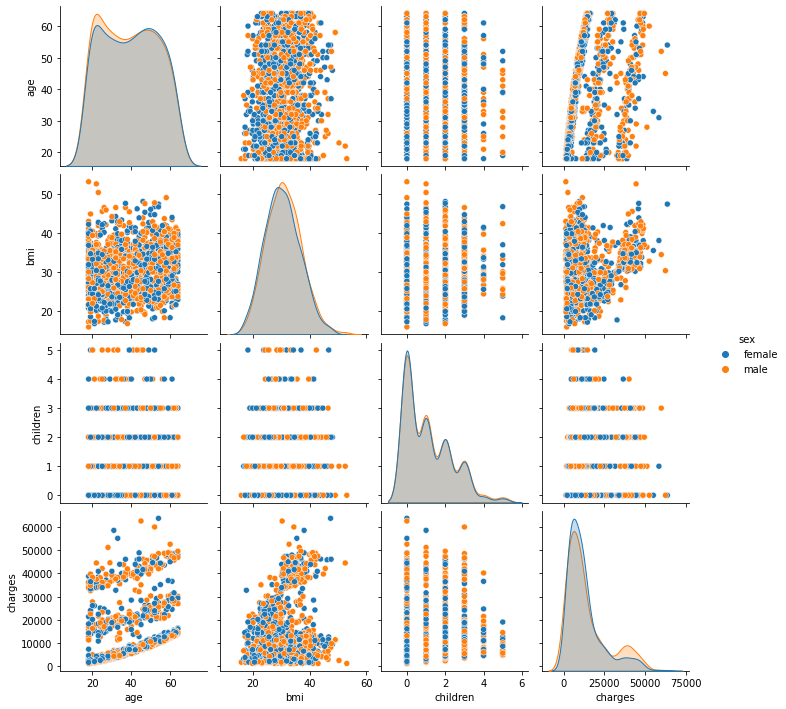

In [91]:
sns.pairplot(data, hue='sex')

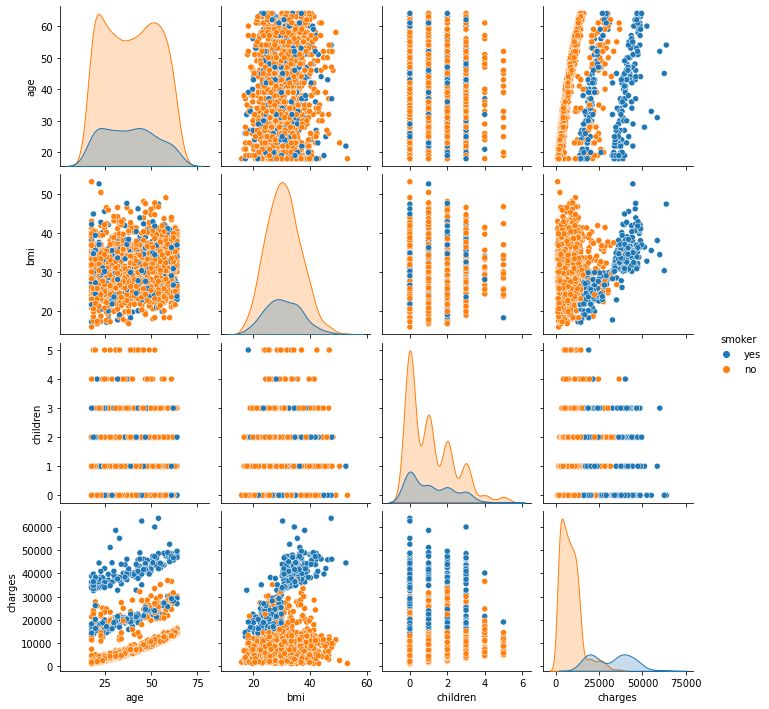

In [92]:
sns.pairplot(data, hue='smoker')

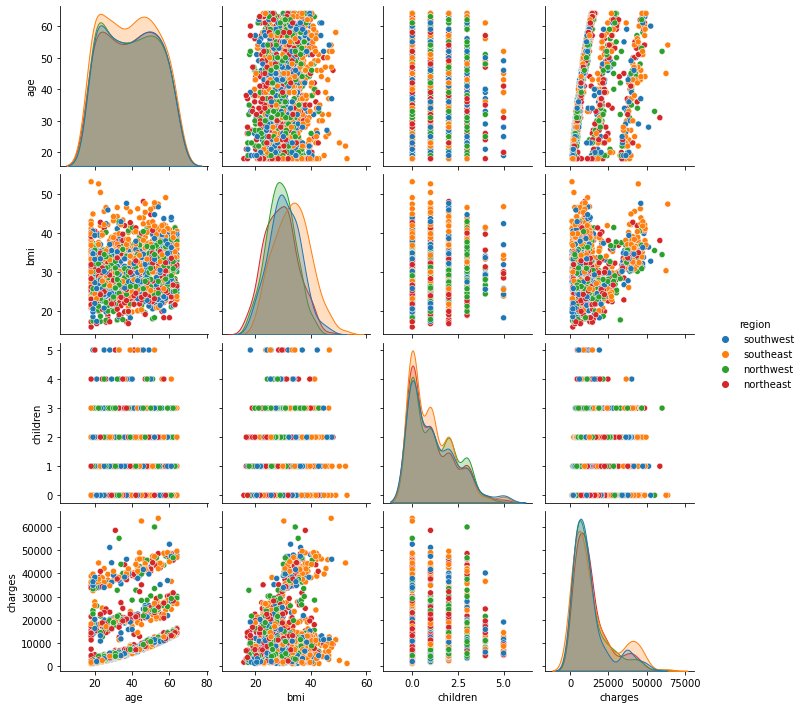

In [93]:
sns.pairplot(data, hue='region')

In [94]:
data_copy.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


### Obervations based on pair plot and correlation table

1. An increase in charges in the case of an existing smoking habit was observed.
2. A positive correlation between ages and charges was observed, alluding to the fact that older people were charged more.
3. Individuals with 5 children were charged lower amounts as compared to the rest.

# Hypothesis Testing using Statistical tests

### What is a t-test?
T-test measures the difference between two means, which may or may not be related to each other, indicating the probability of the differences to have happened by chance.

### What is a null hypothesis?
A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations.

In [95]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## a. Does the charge differ based on smoking habits?

In [59]:
pd.DataFrame.from_dict(dict(
    {
        'charges_smokers':data[data.smoker == 'yes'].charges.skew(),    
        'charges_non-smokers': data[data.smoker == 'no'].charges.skew(),
    }), orient='index', columns=['Skewness'])

,Skewness
charges_smokers,0.128217
charges_non-smokers,1.538120


Applying a log transformation 

In [60]:
data.charges  = np.log1p(data.charges)

In [61]:
pd.DataFrame.from_dict(dict(
    {
        'charges_smokers':data[data.smoker == 'yes'].charges.skew(),    
        'charges_non-smokers': data[data.smoker == 'no'].charges.skew(),
    }), orient='index', columns=['Skewness'])

,Skewness
charges_smokers,-0.299684
charges_non-smokers,-0.312578


<AxesSubplot:xlabel='smoker', ylabel='charges'>

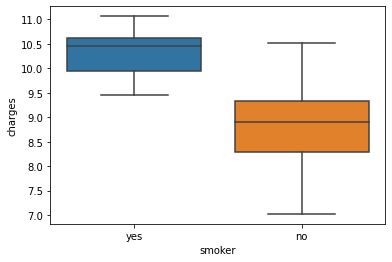

In [62]:
sns.boxplot('smoker', 'charges', data=data)

**H0** : Charges of smokers are same as Charges of Non-smokers

**H1** : Charges of non-smokers are significantly different from Charges of smokers 
    

In [63]:
import scipy.stats as stats

#Split the charges column into two parts between smokers and non-smokers

X = np.array(data[data.smoker == 'yes'].charges) #Smokers
Y = np.array(data[data.smoker == 'no'].charges) #Non-Smokers

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'Since the p_value ({p_value}) < 0.05, we reject the Null Hypothesis. Hence **charges of smokers differ significantly from non-smokers')
else:
    print(f'Since the p_value ({p_value}) > 0.05, we fail to reject Null Hypothesis. Hence **charges of smokers are same as charges of non-smokers')

Since the p_value (5.97782876368448e-172) < 0.05, we reject the Null Hypothesis. Hence **charges of smokers differ significantly from non-smokers


## b. Is the proportion of smokers different in different genders?

<AxesSubplot:xlabel='smoker', ylabel='count'>

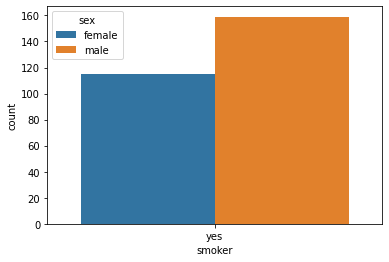

In [64]:
sns.countplot('smoker', hue='sex', data=data[data.smoker == 'yes'])

**H0** : Proportion of smokers are similar in both the Genders

**H1** : Proportion of smokers are significantly different in different Genders
    

In [65]:
#Since Smokers and Sex are categorical columns, choosing Chi-Square test for testing

contigencytable = pd.crosstab(data['sex'],data['smoker'])
chi_sq_Stat, p_value, deg_freedom, exp_freq =  stats.chi2_contingency(contigencytable)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'Since the p_value ({p_value}) < 0.05, we reject the Null Hypothesis. Hence the proportion of smokers is significantly different in different Genders')
else:
    print(f'Since the p_value ({p_value}) > 0.05, we fail to reject Null Hypothesis. Hence the proportion of smokers is similar in both the Genders')


Since the p_value (0.006548143503580696) < 0.05, we reject the Null Hypothesis. Hence the proportion of smokers is significantly different in different Genders


## c. Is the bmi of males similar to that of females?

<AxesSubplot:xlabel='sex', ylabel='bmi'>

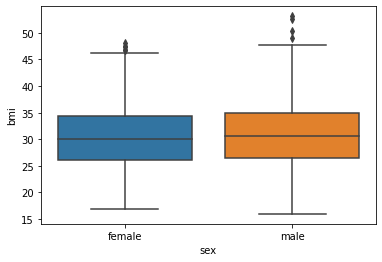

In [66]:
sns.boxplot('sex', 'bmi', data=data)

**H0** : BMI of Males are similar to that of Females

**H1** : BMI of Males are significantly different from that of Females
    

In [67]:
#Split the bmi column into two parts between male and female

X = np.array(data[data.sex == 'male'].bmi) #Males
Y = np.array(data[data.sex == 'female'].bmi) #Females

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value ({p_value}) < 0.05, we reject the Null Hypothesis. Hence BMI of Males are significantly different from that of Females')
else:
    print(f'As the p_value ({p_value}) > 0.05, we fail to reject Null Hypothesis. Hence BMI of Males are similar to that of Females')

As the p_value (0.08997637178984934) > 0.05, we fail to reject Null Hypothesis. Hence BMI of Males are similar to that of Females


## Label Encoding Categorical variables

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [69]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455
5,31,0,25.740,0,0,2,8.231541
6,46,0,33.440,1,0,2,9.016949
7,37,0,27.740,3,0,1,8.893230
8,37,1,29.830,2,0,0,8.765211
9,60,0,25.840,0,0,1,10.272432


# Predictions


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

## Base Model - Linear Regression

In [71]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_train, y_train))
print(lr.score(x_test,y_test))
print(r2_score(y_test_pred, y_test))

0.7597579808210095
0.7871927033155754
0.7415328323897583


## Regularization

In [72]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
el = ElasticNet(l1_ratio = 0.99, alpha = 0.0003).fit(x_train,y_train)

y_train_pred = el.predict(x_train)
y_test_pred = el.predict(x_test)

print(el.score(x_test,y_test))
print(r2_score(y_test_pred, y_test))

0.7871339870866438
0.741053393725707


## Adding polynomial features

In [73]:
X = data.drop(['charges'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))
print(r2_score(Y_test_pred, Y_test))

0.8575309144369195
0.8304721125332125


## Random Forest Regressor

In [74]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              max_depth = 6,
                              random_state = 42)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.102, MSE test data: 0.111
R2 train data: 0.879, R2 test data: 0.868


# Saving the model

In [75]:
import joblib

joblib.dump(forest, 'insurance_model')

['insurance_model']